# Choose a Car Profitably [Car Price prediction]

This work has made by Paul Krivchenia in cooperation with Vitaliy Burlakov (a.k.a Vetak8):
#### [My GitHub](https://github.com/Paull-dark)
#### [Vetak's GitHub](https://github.com/vetak8)
#### [Vetak's Kaggle](https://www.kaggle.com/vitaliyburlakov)

<img src = 'https://i.ytimg.com/vi/Qr9S2zYfAfs/maxresdefault.jpg' width= '800px'>

# Description

The Target of this project is to:
- Collect a dataset from outside sources for training a model. 
- To make a exploratory data analysis 
- Try to predict the price of a car with given technical and commercial car's parameters.

# Note
The training data already collected from auto.ru  by using dedicated notebook. You may find it in GitHUB in the link below:

#### [GitHub_Data_Collector](https://github.com/Paull-dark/Skill_Factory/tree/master/module_6_Cars)

<a id="sec1.1"></a>
## [Features Defination](sec1.1)

**BodyType** -  The type of the Body of car .

**Brand** - Name of brand.

**color** - Color of the car (hex).

**complectation_dict** - specified complecttion of the car.

**description** - human's description of the car (given by seller).

**engineDisplacement** - Working volume of the engine (in $mm^3$).

**enginePower** - Power in Horses.

**equipment** - set of auxilliary equipment.

**fuelType - Diesel, gasoline electric etc.

**image** - url of the image of car.

**mileage** - How many kilometers car passed up to the date.

**modelDate** - When particular model has been designed.

**name** - shows bolume of engine and horse power.

**numberOfDoors** - The number of doors in a single car.

**parsing_unixtime** - time of parsing the data.

**PriceCurrency** - The currency of the car's price.

**productionDate** - The date when the car has been released from factory.

**sell_id** - id number of the seller.

**super_gen** - dictionary with data like: model, price_segment.

**vehicleConfiguration** - shows body type, type of gear, volume of engine.

**vehicleTransmission** - Gear type.

**vendor** - Contry of model's origin.

**Владельцы** - How many owners had particular car before.

**Владение** - How long the seller own a particular car.

**ПТС** - Shows whether the car's documents in original state.

**Привод** - Wheel drive (2WF,4WD etc).

**Руль** - Left or right Wheel.

**Состояние** - condition of a car (good or not).

**Таможня** - whether Custom clearance performed.

**price** - price in RUB.

<a id="sec2"></a>
# [INDEX](#sec2)

<a id="sec1"></a>
1. [Description](#sec1)
   * [1.1 Features Defination](#sec1.1)
2. [INDEX](#sec2)
3. [IMPORT LIBRARRIES](#sec3)
4. [Functions and Classes](#sec4)
5. [Load and Chek the Dataset](#sec5)

<a id="sec2"></a>
# [Import LIBRARIES](#sec2)

In [1]:
import os
import pandas as pd
import numpy as np
import re
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings
from jupyterthemes import jtplot

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Lock a RANDOM SEED to keep experiments reproducible.
np.random.seed(42)

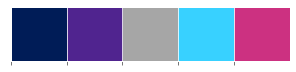

In [3]:
# Set project colors
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff','#cc3181']
sns.palplot(sns.color_palette(colors))

<a id="sec4"></a>
# [Functions and Classes](#sec4)
[(INDEX)](#sec2)

In [4]:
#  The function has been taken from Vladimir Yushmanov 【SF-DST】
def compare_data_sets(train_df,test_df):
    
    list_of_names1 = list(train_df.columns)
    temp_dict = {}
    temp_dict['feature_train'] = list_of_names1
    temp_dict['type_train'] = train_df.dtypes
    temp_dict['sample_train'] = train_df.loc[1].values
    temp_dict['# unique_train'] = train_df.nunique().values
    temp_df1 = pd.DataFrame.from_dict(temp_dict)
    
    
    list_of_names2 = list(test_df.columns)
    temp_dict2 = {}
    temp_dict2['feature_test'] = list_of_names2
    temp_dict2['type_test'] = test_df.dtypes
    temp_dict2['sample_test'] = test_df.loc[1].values
    temp_dict2['# unique_test'] = test_df.nunique().values
    temp_df2 = pd.DataFrame.from_dict(temp_dict2)
    
    temp_insert = pd.DataFrame(columns=['< - >'])
    
    temp_df = pd.concat([temp_df1,temp_insert, temp_df2], axis=1, sort=False)
    temp_df.reset_index(inplace = True)
    del temp_df['index']
    temp_df['< - >'] = '| - |'
    display(temp_df)

    temp_dict3 = {}
    temp_df3= pd.DataFrame(temp_df)
    temp_list  = []
    temp_list2  = []
    temp_list3  = []
    temp_list4  = []
    temp_list5  = []

    for i in range(len(temp_df)):
        if str(temp_df3['type_train'][i]) != str(temp_df3['type_test'][i]):
            temp_list.append(temp_df3['feature_train'][i])
            temp_list2.append(temp_df3['feature_test'][i])
            temp_list3.append(str(temp_df3['type_train'][i]) + ' != ' + str(temp_df3['type_test'][i]))
            temp_list4.append(i)
        if temp_df3['# unique_test'][i]>0 and temp_df3['# unique_train'][i]/temp_df3['# unique_test'][i] > 2:
            temp_list5.append(i)
            
    temp_dict3['index']= temp_list4
    temp_dict3['feature_train']= temp_list
    temp_dict3['не совпадают типы'] = temp_list3
    temp_dict3['feature_test']= temp_list2

    temp_df4 = pd.DataFrame.from_dict(temp_dict3)
    temp_df4.set_index('index',inplace=True)

    print(f'Резюме:\n 1. Не совпали типы в:= {len(temp_df4)} столбцах\n')
    print(f'2. Уникальные значения различаются в:= {len(temp_list5)} столбцах {temp_list5}')
    display(temp_df4)

In [5]:
def pandas_report(data,title,minimal=True):
    ''' Function is called for generating of dataset profile-report'''

    profile = data.profile_report(title=title,
                                  progress_bar=False,
                                  minimal=minimal,
                                  correlations={
                                      'pearson': {
                                          'calculate': True
                                      },
                                      'spearman': {
                                          'calculate': True
                                      },
                                      'kendall': {
                                          'calculate': False
                                      },
                                      'phi_k': {
                                          'calculate': False
                                      },
                                      'cramers': {
                                          'calculate': False
                                      }
                                  },
                                  interactions={
                                      'continuous': True,
                                      'targets': []
                                  },
                                  missing_diagrams={
                                      'heatmap': True,
                                      'dendrogram': False,
                                      'matrix': True
                                  },
                                  vars={'cat': {
                                      'n_obs': 10
                                  }})

    return profile

In [6]:
def get_boxplot(data, X_axis, Y_axis, hue=None, figsize=(7, 5), take_less_box = False):
    '''Function is called to plot boxplots'''
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=X_axis, y=Y_axis, hue=hue, data=data, palette=colors)
    plt.xticks(rotation=45)
    ax.set_title(f'Boxplot for {X_axis} and {Y_axis}', fontsize=14)
    plt.show()

In [7]:
def get_boxplot(data, X_axis, Y_axis, hue=None, figsize=(7, 5), take_less_box=False):
    '''Function is called to plot boxplots'''
    if take_less_box:
        fig, ax = plt.subplots(figsize=figsize)
        sns.boxplot(x=X_axis, y=Y_axis, hue=hue, data=data.loc[data.loc[:, X_axis].isin(
                    data.loc[:, X_axis].value_counts().index[:7])], palette=colors)
        plt.xticks(rotation=45)
        ax.set_title(f'Boxplot for {X_axis} and {Y_axis}', fontsize=14)
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=figsize)
        sns.boxplot(x=X_axis, y=Y_axis, hue=hue, data=data, palette=colors)
        plt.xticks(rotation=45)
        ax.set_title(f'Boxplot for {X_axis} and {Y_axis}', fontsize=14)
        plt.show()

In [8]:
class Encoder:
    def __init__(self, data):
        self.data = data

    def label_encoder(self, column):
        le = LabelEncoder()
        self.data[column] = le.fit_transform(self.data[column])

    def hot_encoder(self, column):
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        aux_df = pd.DataFrame(ohe.fit_transform(self.data[[column]]))
        aux_df.columns = ohe.get_feature_names([f'hot_{column}'])
        self.data = self.data.drop(col, axis=1)
        self.data = pd.concat([self.data, aux_df], axis=1)
        return self.data 

In [9]:
def missing_vars(data, column, random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[column].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[column].value_counts(
            normalize=True).values  # get l;ist of probs
        missing = data[col].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [column]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [10]:
def corr_matrix(data, det=True, pltx=10, plty=10):
    '''Funcion is called for making correlation matrix'''
    
    X = data.corr()
    if det:
        
        evals,evec = np.linalg.eig(X)
        ev_product = np.prod(evals)
    
        print(f'Rank of Matrix: {np.linalg.matrix_rank(X)}')
        print(f'Determinant of matrix: {np.round(ev_product,4)}')
        print(f'Shape of matrix: {np.shape(X)}')
    
    plt.figure(figsize=(pltx,plty))
    sns.heatmap(X,vmin=0,vmax=.9,annot=True,square=True)
    plt.show()

<a id="sec5"></a>
# [5.Load and Chek the Dataset](#sec5)
[(INDEX)](#sec2)

<a id="sec5"></a>
## [5.1 Load train and test sets](#sec5.1)
[(INDEX)](#sec2)

In [11]:
df_train = pd.read_csv('train_parsed_20_05_21.csv',low_memory=False)
df_test = pd.read_csv('test.csv')

In [12]:
df_test['price'] = np.nan

# let's mark where is train where is test set.
df_train['sample'] = 1  # train
df_test['sample'] = 0  # test

In [13]:
df_test.sample(1)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,sample
19026,внедорожник 5 дв.,TOYOTA,https://auto.ru/cars/used/sale/toyota/rav_4/11...,чёрный,NaN,ЛОТ: 01215604\nФаворит Хофф\n\nВы можете получ...,2.0 LTR,150 N12,"{""tinted-glass"":true,""airbag-driver"":true,""iso...",бензин,https://autoru.naydex.net/LxPU17803/f5b8d77S/u...,121490,2000,"{""code"":""RAV_4"",""name"":""RAV4"",""ru_name"":""Рав4""...",RAV_4,2.0 AT (150 л.с.) 4WD,5,1603286281,RUB,2001,1100331690,"{""id"":""6503031"",""displacement"":1998,""engine_ty...",ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,JAPANESE,3 или более,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен,NaN,0


In [14]:
df_train.sample(1)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,sample
44503,Универсал 5 дв.,Ford,NaN,0000CC,{'id': '0'},Приглашаем Вас посетить наш автосалон. Все авт...,1597.0,100.0,"{'condition': True, 'audiosystem-cd': True}",бензин,//avatars.mds.yandex.net/get-autoru-vos/436623...,136200,2001.0,"{'code': 'FOCUS', 'name': 'Focus', 'ru_name': ...",FOCUS,1.6 MT (100 л.с.),5.0,today,RUR,2004,1103436792,"{'id': '7699812', 'name': 'I Рестайлинг', 'ru_...",useless_col,MECHANICAL,AMERICAN,4.0,useless_col,ORIGINAL,передний,LEFT,True,True,259000.0,1


In [15]:
print(
    f'Shape of Train Dataset:{df_train.shape}\nShape of Test Dataset:{df_test.shape} \n'
)

Shape of Train Dataset:(57518, 34)
Shape of Test Dataset:(34686, 34) 



Rename columns removing spaces and substituting capital letters

In [16]:
columns = {
    'bodyType': 'body_type',
    'engineDisplacement': 'engine_displacement',
    'enginePower': 'engine_power',
    'fuelType': 'fuel_type',
    'modelDate': 'model_date',
    'numberOfDoors': 'doors_count',
    'priceCurrency': 'price_currency',
    'productionDate': 'production_date',
    'vehicleConfiguration': 'vehicle_configuration',
    'vehicleTransmission': 'vehicle_transmission',
    'Владельцы': 'owner_count',
    'Владение': 'owning_period',
    'ПТС': 'car_passport',
    'Привод': 'wheel_drive',
    'Руль': 'wheel_location',
    'Состояние': 'condition',
    'Таможня': 'custom'
}

In [17]:
df_test.rename(columns=columns,inplace=True)
df_train.rename(columns=columns,inplace=True)

For the proper processing of features, we need to combine train and test sets into a one dataset.

However, as we scrapped data from web, we have to compare whar we scrapped with test set and then fix it 

In [18]:
compare_data_sets(df_train,df_test)

,feature_train,type_train,sample_train,# unique_train,< - >,feature_test,type_test,sample_test,# unique_test
0,body_type,object,Внедорожник 5 дв.,112,| - |,body_type,object,лифтбек,24
1,brand,object,BMW,16,| - |,brand,object,SKODA,12
2,car_url,float64,NaN,0,| - |,car_url,object,https://auto.ru/cars/used/sale/skoda/octavia/1...,34686
3,color,object,040001,16,| - |,color,object,чёрный,16
4,complectation_dict,object,{'id': '0'},4128,| - |,complectation_dict,object,NaN,2364
5,description,object,"Продаю свой х3 , вписан в птс , птс оригинал ,...",48634,| - |,description,object,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,31732
6,engine_displacement,float64,1997.0,452,| - |,engine_displacement,object,1.6 LTR,55
7,engine_power,float64,184.0,334,| - |,engine_power,object,110 N12,315
8,equipment_dict,object,"{'asr': True, 'tinted-glass': True, 'esp': Tru...",36878,| - |,equipment_dict,object,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",23705
9,fuel_type,object,бензин,6,| - |,fuel_type,object,бензин,5


Резюме:
 1. Не совпали типы в:= 7 столбцах

2. Уникальные значения различаются в:= 2 столбцах [0, 6]


,feature_train,не совпадают типы,feature_test
index,,,
2,car_url,float64 != object,car_url
6,engine_displacement,float64 != object,engine_displacement
7,engine_power,float64 != object,engine_power
12,model_date,float64 != int64,model_date
16,doors_count,float64 != int64,doors_count
17,parsing_unixtime,object != int64,parsing_unixtime
25,owner_count,float64 != object,owner_count


We can see that 8 columns in test and train datasets have different datatypes. We have to threat it before stacking datasets.

- CAR_URL -ignore this feature and delete from test set

- Engine_displacement - convert data from train set to $liters$ and clear letters from test set

- Engine_power - Clear trash from test set and convert it to float64 type

- numberOfDoors - convert float64 in train set to int64(same with test set)

- parsing_unixtime - delete this column. (we did not include this data during parsing due to lack of brain :) )


<a id="sec5.2"></a>
## [5.2 Pre-processing before stacking data sets](#sec5.2)
[(INDEX)](#sec2)

In [19]:
# drop 100% usless cols
df_test = df_test.drop(['car_url','parsing_unixtime'],axis=1)
df_train = df_train.drop(['car_url','parsing_unixtime'],axis=1)

**[engineDisplacement column]**

In [20]:
# convert mm to liters in train set
df_train['engine_displacement'] = round(df_train['engine_displacement']/1000, 1)

# clear 'LTR in test set'
df_test['engine_displacement'] = df_test['engine_displacement'].apply(
    lambda x: str(x).replace('LTR', ''))

# convert object to float in test set
df_test['engine_displacement'] = df_test['engine_displacement'].apply(
    lambda x: np.nan if x.strip() == '' else float(x))

**[enginePower column]**

In [21]:
# clear 'N12 in test set'
df_test['engine_power'] = df_test['engine_power'].apply(
    lambda x: str(x).replace('N12', ''))

# convert object to float in test set
df_test['engine_power'] = df_test['engine_power'].apply(
    lambda x: np.nan if x.strip() == '' else float(x))

**[Владельцы]**

In [22]:
# we know that test set has only 3 categories of data: 1 owner, 2 owners, 3 or more.
# Let's do same for train set
df_train['owner_count'] = df_train['owner_count'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'3'}).astype('category')

# And clear test set from usless words.
df_test['owner_count'] = df_test['owner_count'].apply(lambda x: x[0]).astype('category')

**[modelDate]**

In [23]:
# figure out the missing values issue and change type to int64 for cols:
cols_to_int64 = ['model_date', 'doors_count']

for col in cols_to_int64:
    missing_vars(df_train, col)
    df_train[col] = df_train[col].astype('int64')

**[bodyType]**

With a reference to a comparison of train and test data frames we may note that **bodyType** in train set has much more unique values (112 against 24 in test set), however, in fact the data varies not too much. It happened because some additionla description had been added into a train set. We will precess it in feature engineering section.
Here we just change upercase to lowercase.

In [28]:
df_train['body_type'] = list(str(x).lower().replace('.','') for x in df_train['body_type'])
df_test['body_type'] = list(str(x).lower().replace('.','') for x in df_test['body_type'])

**[color]**

In scrapped data colores presented in hex code, while in test data it is presented by russian names of color.

Bring it in line with the test set.

In [29]:
color_map = {'FFD600':'Жёлтый',
          "660099":'Пурпурный',
          "DEA522":'Золотистый',
          "007F00":'Зелёный',
          "040001":'Чёрный',
          "C49648":'Бежевый',
          "CACECB":'Серебристый',
          "EE1D19":'Красный',
          "0000CC":'Синий',
          "22A0F8":'Голубой',
          "FFC0CB":'Розовый',
          "4A2197":'Фиолетовый',
          "FF8649":'Оранжевый',
          "200204":'Коричневый',
          "97948F":'Серый',
          "FAFBFB":'Белый'}

df_train['color'] = df_train['color'].map(color_map)

In [30]:
df_train.sample(1)

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,equipment_dict,fuel_type,image,mileage,model_date,model_info,model_name,name,doors_count,price_currency,production_date,sell_id,super_gen,vehicle_configuration,vehicle_transmission,vendor,owner_count,owning_period,car_passport,wheel_drive,wheel_location,condition,custom,price,sample
26883,лифтбек,Skoda,Чёрный,"{'id': '22128738', 'name': 'Style', 'available...",ВЕСЬ Май у нас действуют специальные условия н...,1.4,125.0,"{'cruise-control': True, 'esp': True, 'usb': T...",бензин,//avatars.mds.yandex.net/get-autoru-vos/216200...,0,2020,"{'code': 'RAPID', 'name': 'Rapid', 'ru_name': ...",RAPID,1.4 AMT (125 л.с.),5,RUR,2021,1103153485,"{'id': '21738448', 'name': 'II', 'ru_name': '2...",useless_col,ROBOT,EUROPEAN,NaN,useless_col,ORIGINAL,передний,LEFT,True,True,1582942.0,1


**[price_currency]**

Let's change 'RUR' to 'RUB'

In [31]:
df_train['price_currency'] = df_train['price_currency'].map({'RUR': 'RUB'})

**[vehicle_transmission]**

Let's translate from russian to English data in test set.


In [32]:
eng_dict = {
    'роботизированная': 'ROBOT',
    'механическая': 'MECHANICAL',
    'автоматическая': 'AUTOMATIC',
    'вариатор': 'VARIATOR'
}

df_test['vehicle_transmission'] = df_test['vehicle_transmission'].map(eng_dict)

**[car_passport]**

Do the same for car_passport

In [33]:
df_test['car_passport'] = df_test['car_passport'].map(
    {'Оригинал': 'ORIGINAL', 'Дубликат': 'DUPLICATE'})

**[wheel_location]**

In [34]:
df_test['wheel_location'] = df_test['wheel_location'].map(
    {'Левый': 'LEFT', 'Правый': 'RIGHT'})

***Condition*** and ***custom*** columns has only one unique value, means it will not give us any usefull information. We will delete them in future section.

Rest of columns will be keep unchangeable for a while

Final verification before merging

In [35]:
compare_data_sets(df_train,df_test)

,feature_train,type_train,sample_train,# unique_train,< - >,feature_test,type_test,sample_test,# unique_test
0,body_type,object,внедорожник 5 дв,111,| - |,body_type,object,лифтбек,24
1,brand,object,BMW,16,| - |,brand,object,SKODA,12
2,color,object,Чёрный,16,| - |,color,object,чёрный,16
3,complectation_dict,object,{'id': '0'},4128,| - |,complectation_dict,object,NaN,2364
4,description,object,"Продаю свой х3 , вписан в птс , птс оригинал ,...",48634,| - |,description,object,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,31732
5,engine_displacement,float64,2.0,58,| - |,engine_displacement,float64,1.6,54
6,engine_power,float64,184.0,334,| - |,engine_power,float64,110.0,315
7,equipment_dict,object,"{'asr': True, 'tinted-glass': True, 'esp': Tru...",36878,| - |,equipment_dict,object,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",23705
8,fuel_type,object,бензин,6,| - |,fuel_type,object,бензин,5
9,image,object,//avatars.mds.yandex.net/get-autoru-vos/199239...,54511,| - |,image,object,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,34557


Резюме:
 1. Не совпали типы в:= 0 столбцах

2. Уникальные значения различаются в:= 1 столбцах [0]


,feature_train,не совпадают типы,feature_test
index,,,


Let's finally merge train and test sets

In [37]:
df = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # combine sets

In [38]:
display(df.sample(3))
df.info()

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,equipment_dict,fuel_type,image,mileage,model_date,model_info,model_name,name,doors_count,price_currency,production_date,sell_id,super_gen,vehicle_configuration,vehicle_transmission,vendor,owner_count,owning_period,car_passport,wheel_drive,wheel_location,condition,custom,price,sample
88390,седан,Hyundai,Чёрный,"{'id': '21819952', 'name': 'Comfort + Winter',...",Только в этом месяце! Специальные условия на п...,1.6,123.0,"{'cruise-control': True, 'glonass': True, 'esp...",бензин,//avatars.mds.yandex.net/get-autoru-vos/369074...,0,2020,"{'code': 'SOLARIS', 'name': 'Solaris', 'ru_nam...",SOLARIS,1.6 AT (123 л.с.),4,RUB,2021,1103613152,"{'id': '21796089', 'name': 'II Рестайлинг', 'r...",useless_col,AUTOMATIC,KOREAN,NaN,useless_col,ORIGINAL,передний,LEFT,True,True,1256000.0,1
44562,седан,Nissan,Серебристый,{'id': '0'},В РОЛЬФ Октябрьская | Автомобили с пробегом вс...,1.6,102.0,"{'electro-window-back': True, 'condition': Tru...",бензин,//avatars.mds.yandex.net/get-autoru-vos/419427...,121383,2012,"{'code': 'ALMERA', 'name': 'Almera', 'ru_name'...",ALMERA,1.6 AT (102 л.с.),4,RUB,2015,1103484505,"{'id': '9278965', 'name': 'III (G15)', 'ru_nam...",useless_col,AUTOMATIC,JAPANESE,2,useless_col,ORIGINAL,передний,LEFT,True,True,437000.0,1
1925,внедорожник 5 дв,SKODA,белый,NaN,В машине не курили . Машина обслужена и вложен...,1.8,152.0,"{""tinted-glass"":true,""airbag-driver"":true,""aux...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,159000,2013,"{""code"":""YETI"",""name"":""Yeti"",""ru_name"":""Йети"",...",YETI,1.8 AMT (152 л.с.) 4WD,5,RUB,2014,1100499174,"{""id"":""20495342"",""displacement"":1798,""engine_t...",ALLROAD_5_DOORS ROBOT 1.8,ROBOT,EUROPEAN,2,1 год и 3 месяца,ORIGINAL,полный,LEFT,Не требует ремонта,Растаможен,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92204 entries, 0 to 92203
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   body_type              92204 non-null  object  
 1   brand                  92204 non-null  object  
 2   color                  92204 non-null  object  
 3   complectation_dict     63936 non-null  object  
 4   description            90802 non-null  object  
 5   engine_displacement    92147 non-null  float64 
 6   engine_power           92202 non-null  float64 
 7   equipment_dict         82208 non-null  object  
 8   fuel_type              92204 non-null  object  
 9   image                  89753 non-null  object  
 10  mileage                92204 non-null  int64   
 11  model_date             92204 non-null  int64   
 12  model_info             92204 non-null  object  
 13  model_name             92204 non-null  object  
 14  name                   92202 non-null 

<a id="sec5.3"></a>
## [5.3 Missing Values](#sec5.3)
[(INDEX)](#sec2)

Let's observe an empty data

body_type - 0.0%
brand - 0.0%
color - 0.0%
complectation_dict - 31.0%
description - 2.0%
engine_displacement - 0.0%
engine_power - 0.0%
equipment_dict - 11.0%
fuel_type - 0.0%
image - 3.0%
mileage - 0.0%
model_date - 0.0%
model_info - 0.0%
model_name - 0.0%
name - 0.0%
doors_count - 0.0%
price_currency - 1.0%
production_date - 0.0%
sell_id - 0.0%
super_gen - 0.0%
vehicle_configuration - 0.0%
vehicle_transmission - 0.0%
vendor - 0.0%
owner_count - 11.0%
owning_period - 25.0%
car_passport - 1.0%
wheel_drive - 0.0%
wheel_location - 0.0%
condition - 1.0%
custom - 1.0%
price - 38.0%
sample - 0.0%


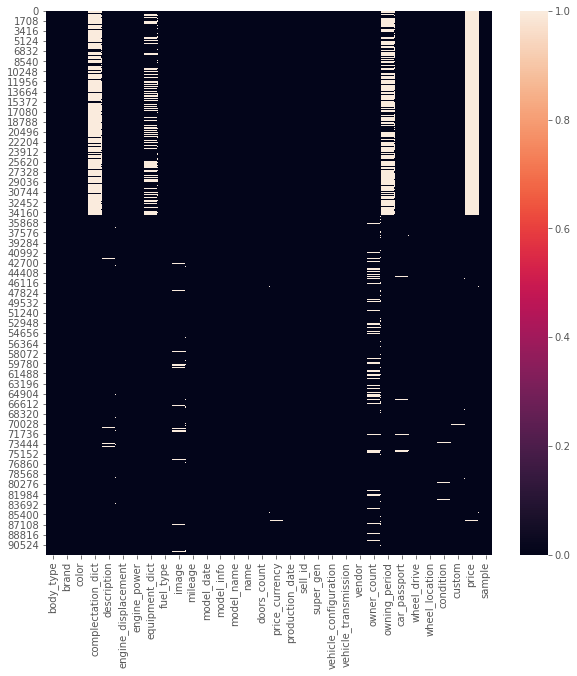

In [39]:
# Plot missing values
cols = df.columns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[cols].isnull(), )

# Show in percents
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

<a id="sec5.3"></a>
## [5.3 Pandas Profiling](#sec5.3)
[(INDEX)](#sec2)

In [ ]:
# # We won't include some colums in the report
# cols_exclude = [
#     'complectation_dict', 'sample', 'image', 'name', 'super_gen',
#     'equipment_dict', 'price_currency', 'owning_period',
#     'vehicle_configuration'
# ]

# data_profile = pandas_report(df_train.drop(cols_exclude, axis=1),'car_price_prediction')
# # Check your folder
# data_profile.to_file('pandas_report.html')  

#### Link for the  **[the dataset profile report](./pandas_report.html)**.

 - Dataset has 29 features (excluding feature 'Sample')
 
 - Total Number Of observations is 57 518
 
 - Missing values is about 1.0% (However, we need to remember that we generatated NaN in the test set for **price** column)
 
 - There are 0.9% potential duplicates
 
 
 - ***body_type*** 0.2% of unique entities. We need to process this column in the future sections. 
 
 - ***brand*** we have scrapped 18 model of cars.
 
 - ***color*** Consists 16 distinct categories: 
     
  - Чёрный (26.6%)
 
  - Белый (22.8%)
 
  - Серый (14%)
 
  - Серебристый (10.2%)
 
  - Синий (9.1%)
 
  - Красный (5%)
 
  - other colors (13.3%)
 
 - ***description*** - has 58 distinct descriptions. This means some of the information is repeating. It can say us that there are some sale announcements from agency sellers (perekup). Good insight.
 
 - ***engine_displacement*** - the overwhelming majority of engines has a volume of 2 liters. Right after it comes the engine with 1.6 liters. This information could be converted to a categorical one with the sorting of engines like <span style="color:red">low volume, middle, high engine volume.</span>
  - mean - 2.23 l;
 
  - median - 2 l;
 
  - Q1 - 1.4 l;
 
  - Q3 - 2.5 l;
 
  - maximum - 7.3 (insane :))
 
  - minimum - 0 (strange. need to process it)
 
 - ***engine_power*** - most common power is 150 h.p. Second place takes engine with power 249 h.p.
 
  - mean - 178;
  
  - median - 150;
 
  - Q1 - 123;
 
  - Q3 - 211;
 
  - maximum - 639;
 
  - minimum - 20 (Hm... bicycle?)
 
 It is obvious, our data set has outliers. We need to take care of them further.
 
 - ***fuel_type*** - Of course, the first place takes Gasoline (бензин). Seems nothing interesting here.
 
 - ***mileage*** - We have distribution biased to left with a huge amount of cars with zero mileage (probably new cars). That is also good feature <span style="color:red">insight</span> . Need to separate new cars from used.
 
 - ***model_date***Distribution with right tail. Most of models presented in dataset designed in 21st Century
 
  - mean - 2010;
  
  - median - 2012;
 
  - Q1 - 2007;
 
  - Q3 - 2017;
 
  - maximum - 2021;
 
  - minimum - 1908
 
 For models<span style="color:red"> below 1970 the feature 'rarity' can be added</span>
 
 - ***model_info*** - Dictionary with information. Need to be processed separately.
 
 - ***model_name*** - consits model names such as 'FOCUS','POLO','CAMRY'
 
 - ***doors_count*** - Overwhelming majority of cars in dataset has 5 doors.
 
 - ***production_date*** - We have distribution biased to right. Most of cars in our dataset quite fresh. It must impact on the price.
 
  - mean - 2012;
  
  - median - 2014;
 
  - Q1 - 2008;
 
  - Q3 - 2018;
 
  - maximum - 2021;
 
  - minimum - 1922
 
 - ***sell_id*** - has 99% distinct values. It may consist of duplicates or some guys who often sell cars. (perekup).
 
 - ***vehicle_transmission*** - It is a categorical feature. Most of types are *automatic*. 
 
 - ***vendor*** - We scrapped 4 vendors. Japan takes 1st place in the distribution. Then European and Korean. AMERICAN takes last place.
 
 - ***owner_count*** -  Has a lot of missing values (16%). Category 3  means 3 or more owners and it takes first place in the distribution. Then one owner
 
 -***car_passport*** 88% has original passport
 
 -***wheel_drive*** 51% has Front wheel drive(FWD), 43% has 4WD. Rest of them RWD.
 
 -***wheel_location*** - 93% has left location of wheel
 
 -***Condition*** - Consits only one category. Usless column. Need to <span style="color:red"> delete it</span>
 
 -***custom*** - Consits only one category. Usless column. Need to <span style="color:red"> delete it</span>
 
 -***price*** - is a target variable. Consists 0.9% of missing. Detailed analysis will be performed later.
 
 
Need to be noted that we have some strong correlations such as production year correlated with a mileage, engine power and price etc.. 
 
 
 
 
 
 

<a id="sec6"></a>
# [6.Data Analyse](#sec6)
[(INDEX)](#sec2)

<img src = 'http://www.digitalvidya.com/wp-content/uploads/2017/04/Meme-DA.jpg' width= '400px'>

<a id="sec6"></a>
## [Target Variable](#sec6)
[(INDEX)](#sec2)

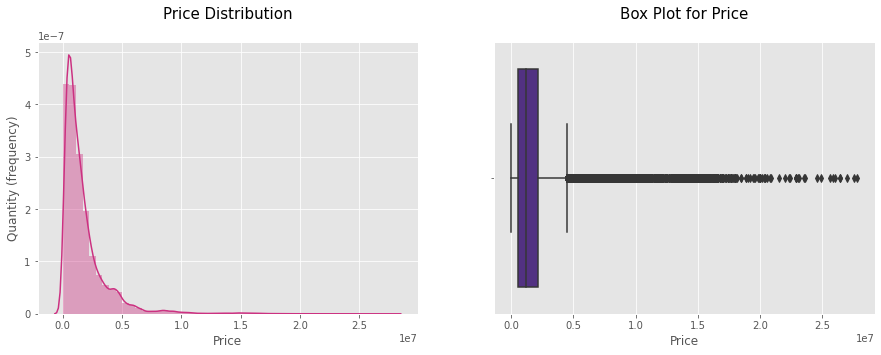

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(df_train.price.values, bins=50, color=colors[4])
plt.title('Price Distribution\n', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Quantity (frequency)');

plt.subplot(122)
sns.boxplot(df_train.price.values, color=colors[1])
plt.title('Box Plot for Price\n', fontsize=15)
plt.xlabel('Price');

In [41]:
df_train['price'].describe()

count    5.697700e+04
mean     1.757438e+06
std      2.015235e+06
min      1.200000e+04
25%      5.800000e+05
50%      1.160000e+06
75%      2.149000e+06
max      2.780000e+07
Name: price, dtype: float64

The Target variable has a biased distribution shifted to the left side of 0 to 27 millions. 

The first and third quartiles are in the range from 500k to 2million, the mean is 1.7 million. Also outliers has been observed for target variable.

In [42]:
cat_cols = ['body_type','brand',
            'color','fuel_type',
            'vehicle_transmission',
            'vendor','owner_count',
            'car_passport','wheel_drive',
            'wheel_location'
           ]

Before we do, let's fill missing values up

In [ ]:
# for col in cat_cols:
#     missing_vars(df_train, col)

Check out how many body types in total we have

In [44]:
print(f'Total Number of body types in DataSet: {df_train.body_type.nunique()}')

Total Number of body types in DataSet: 111


It's quite a lot. Let's reduce quantity by exctracting the key meaning.

In [45]:
pattern = re.compile('[а-я]*')
new_column = []
for string in df_train['body_type']:
    new_column.append(pattern.match(str(string))[0])
df_train['body_type'] = new_column

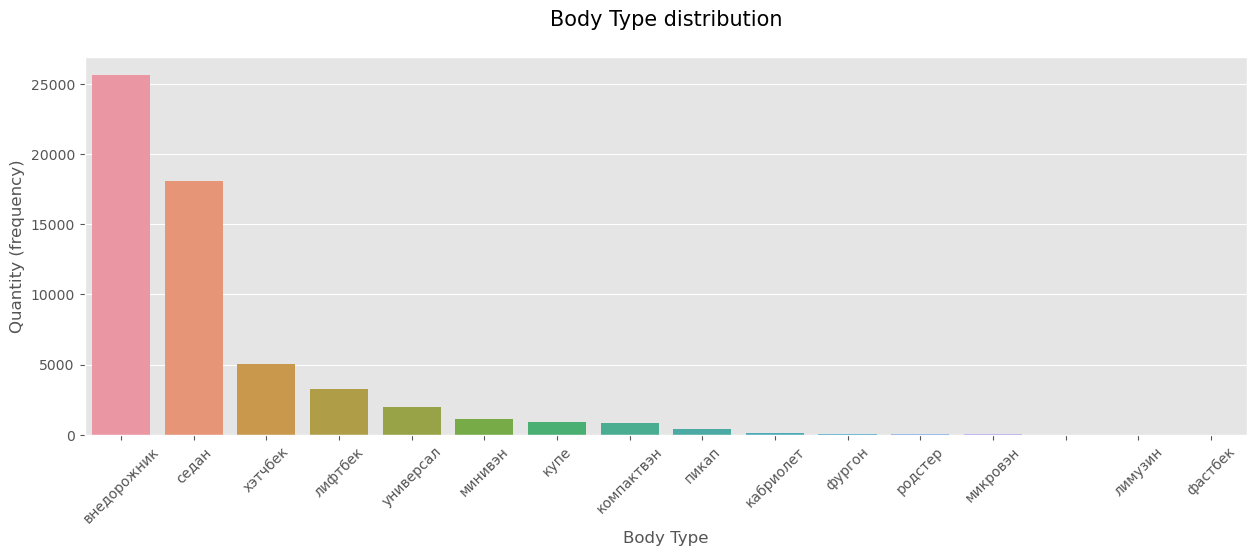

In [46]:
plt.figure(figsize=(15, 5), dpi=100)
sns.countplot(df_train['body_type'], order=df_train['body_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Body Type distribution\n', fontsize=15)
plt.xlabel('Body Type')
plt.ylabel('Quantity (frequency)');

Well, most popular body type is 'внедорожник' (ALL ROAD DRIVE), then 'седан' (sedan). In the feature engineering section we could squize this feature even more stronger by giving unpopular body_type the name: 'other'

Let's see how it is impact on price. In addition, let's see whether the number ow owners impact on price

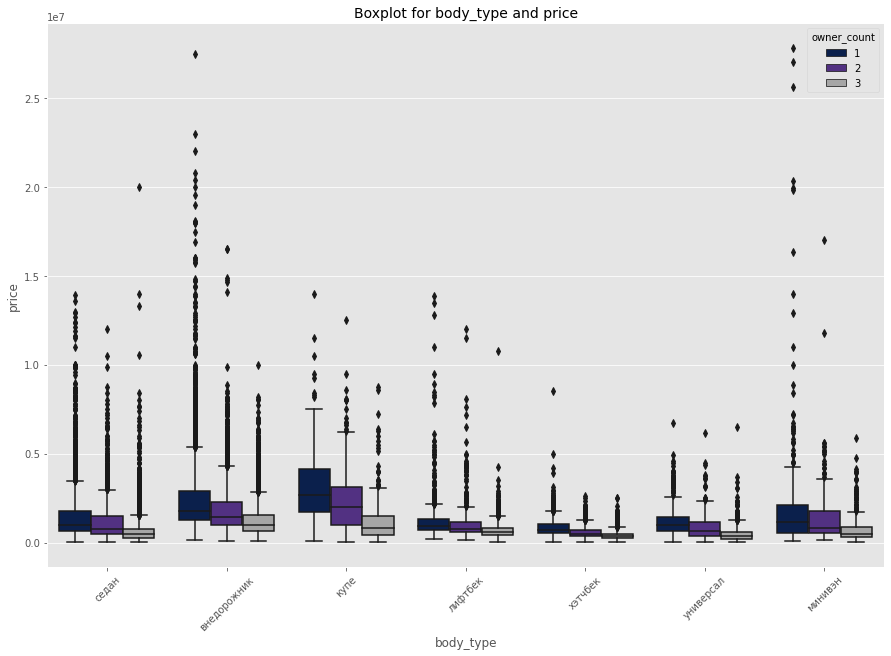

In [47]:
get_boxplot(df_train, 'body_type', 'price', figsize=(
    15, 10), hue='owner_count', take_less_box=True)

We can see that quantity of owners impacts on the final price. More owners car had, less final price. Also, body type itself impact on price car.

What transmission is more expensive or how it's impact on price?

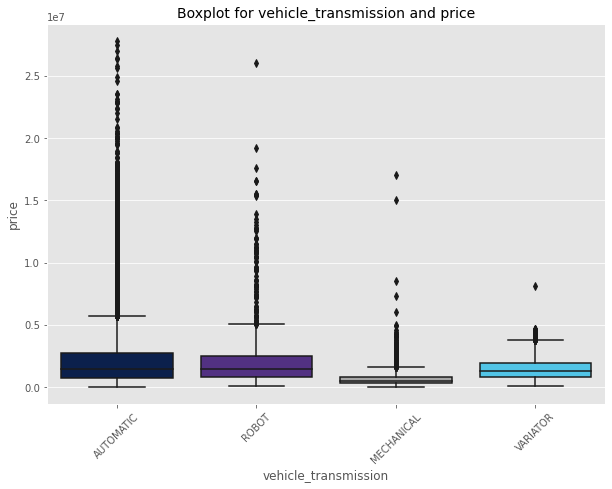

In [48]:
get_boxplot(df_train, 'vehicle_transmission', 'price', figsize=(10, 7))

Automatic and robotic transmissions have almost same price range while price for car with variator is a little bit less. Mechanical transmission is most cheap. Perhaps, we could add new feature, to sumarize all of above. Automatic and robotic transmissions combine in one category.

In [49]:
encoder = Encoder(df_train)

In [50]:
for col in cat_cols:
    encoder.label_encoder(col)

In [51]:
df_train['color'].unique()

array([ 1, 15,  4, 12, 13,  6,  7, 14, 11,  8,  2,  0,  5,  3,  9, 10])

Rank of Matrix: 10
Determinant of matrix: 0.5284
Shape of matrix: (10, 10)


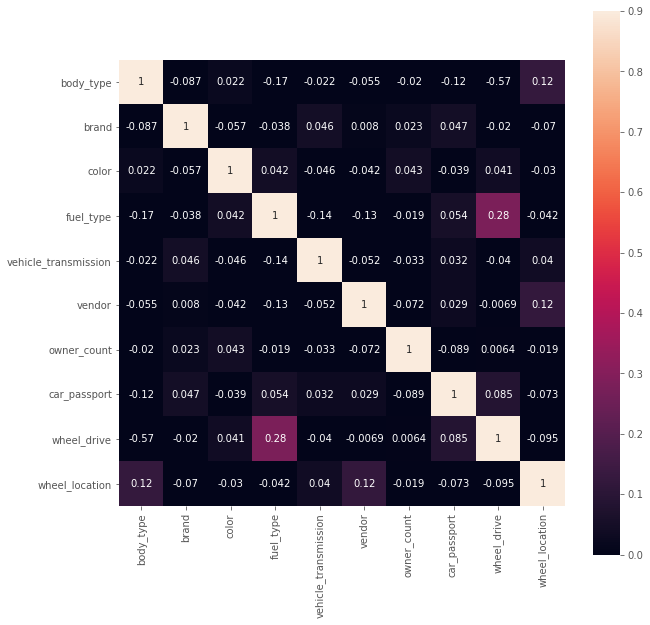

In [52]:
corr_matrix(df_train[cat_cols],det=True)

In [ ]:
cat_cols

<a id="sec6"></a>
# [6.Draw a Conclusion](#sec6)
[(INDEX)](#sec2)

Target variable has outliers
Target variable has missing values.

In [54]:
df_test['super_gen'][0]

'{"id":"10373605","displacement":1197,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"ROBOT","power":105,"power_kvt":77,"human_name":"1.2 AMT (105 л.с.)","acceleration":10.5,"clearance_min":155,"fuel_rate":5}'

In [ ]:
pattern = re.compile('[а-я]*')
new_column = []
for string in df_test['bodyType']:
    new_column.append(pattern.match(str(string))[0])
data['bodyTypeShort'] = new_column

In [ ]:
new_column